In [ ]:
# This Model was worked on by Kori & Mary. Shout out to Kori.

In [ ]:
# Make sure to pip install keras & tensorflow in Python or you will not be able to run part of the program.
# Before running the data, make sure you have installed keras, tensorflow, and timetk in R

In [1]:
library(keras)
library(tensorflow)
library(readxl)
library(ggplot2)
library(dplyr)
library(timetk)

Warning message:
"package 'keras' was built under R version 4.2.3"
Warning message:
"package 'tensorflow' was built under R version 4.2.3"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [12]:
GoldmanSachs = read_xlsx(r"(C:\Users\Mary\Documents\Data Science Classes\Final Project\Excel Master Data Sets\GS Master.xlsx)")

head(GoldmanSachs)

Date,Open,High,Low,Close,Adj Close,Volume
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-03,94.1875,94.3750,87.750,88.3125,65.69053,1822600
2000-01-04,87.0000,87.5000,82.250,82.7500,61.55291,1647700
2000-01-05,80.8750,81.8750,78.375,78.8750,58.67053,1516600
2000-01-06,78.6250,84.5000,78.625,82.2500,61.18100,1845100
2000-01-07,83.0625,83.1875,79.875,82.5625,61.41344,1127400
2000-01-10,81.7500,84.8750,81.750,84.3750,62.76167,803100


In [13]:
# Creating Scale Factors for Close

scale_factors <- c(mean(GoldmanSachs$Close), sd(GoldmanSachs$Close))

scale_factors

[1] 161.56489  67.93529

In [14]:
# Creating Scaled Train for Close

scaled_train <- GoldmanSachs %>%
    dplyr::select(Close) %>%
    dplyr::mutate(Close = (Close - scale_factors[1]) / scale_factors[2])

head(scaled_train)

Close
<dbl>
-1.078267
-1.160147
-1.217186
-1.167506
-1.162906
-1.136227


In [15]:
# Creating a lag for prediction

prediction <- 12
lag <- prediction

In [16]:
## Creating a x train array

scaled_train <- as.matrix(scaled_train)
 
# we lag the data 11 times and arrange that into columns
x_train_data <- t(sapply(
    1:(length(scaled_train) - lag - prediction + 1),
    function(x) scaled_train[x:(x + lag - 1), 1]
  ))
 
# now we transform it into 3D form
x_train_arr <- array(
    data = as.numeric(unlist(x_train_data)),
    dim = c(
        nrow(x_train_data),
        lag,
        1
    )
)

head(x_train_data)

x_train_arr

-1.078267,-1.160147,-1.217186,-1.167506,-1.162906,-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307
-1.160147,-1.217186,-1.167506,-1.162906,-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307,-1.113227
-1.217186,-1.167506,-1.162906,-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307,-1.113227,-1.116907
-1.167506,-1.162906,-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307,-1.113227,-1.116907,-1.174866
-1.162906,-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307,-1.113227,-1.116907,-1.174866,-1.143587
-1.136227,-1.129787,-1.136227,-1.134387,-1.117827,-1.099427,-1.089307,-1.113227,-1.116907,-1.174866,-1.143587,-1.079187


, , 1

                 [,1]          [,2]          [,3]          [,4]          [,5]
   [1,] -1.078267e+00 -1.160147e+00 -1.217186e+00 -1.167506e+00 -1.162906e+00
   [2,] -1.160147e+00 -1.217186e+00 -1.167506e+00 -1.162906e+00 -1.136227e+00
   [3,] -1.217186e+00 -1.167506e+00 -1.162906e+00 -1.136227e+00 -1.129787e+00
   [4,] -1.167506e+00 -1.162906e+00 -1.136227e+00 -1.129787e+00 -1.136227e+00
   [5,] -1.162906e+00 -1.136227e+00 -1.129787e+00 -1.136227e+00 -1.134387e+00
   [6,] -1.136227e+00 -1.129787e+00 -1.136227e+00 -1.134387e+00 -1.117827e+00
   [7,] -1.129787e+00 -1.136227e+00 -1.134387e+00 -1.117827e+00 -1.099427e+00
   [8,] -1.136227e+00 -1.134387e+00 -1.117827e+00 -1.099427e+00 -1.089307e+00
   [9,] -1.134387e+00 -1.117827e+00 -1.099427e+00 -1.089307e+00 -1.113227e+00
  [10,] -1.117827e+00 -1.099427e+00 -1.089307e+00 -1.113227e+00 -1.116907e+00
  [11,] -1.099427e+00 -1.089307e+00 -1.113227e+00 -1.116907e+00 -1.174866e+00
  [12,] -1.089307e+00 -1.113227e+00 -1.116907e+00 -1.174866e+00 -1.143587e+00
  [13,] -1.113227e+00 -1.116907e+00 -1.174866e+00 -1.143587e+00 -1.079187e+00
  [14,] -1.116907e+00 -1.174866e+00 -1.143587e+00 -1.079187e+00 -1.068147e+00
  [15,] -1.174866e+00 -1.143587e+00 -1.079187e+00 -1.068147e+00 -1.097587e+00
  [16,] -1.143587e+00 -1.079187e+00 -1.068147e+00 -1.097587e+00 -1.029507e+00
  [17,] -1.079187e+00 -1.068147e+00 -1.097587e+00 -1.029507e+00 -1.035027e+00
  [18,] -1.068147e+00 -1.097587e+00 -1.029507e+00 -1.035027e+00 -1.036867e+00
  [19,] -1.097587e+00 -1.029507e+00 -1.035027e+00 -1.036867e+00 -1.121507e+00
  [20,] -1.029507e+00 -1.035027e+00 -1.036867e+00 -1.121507e+00 -1.131627e+00
  [21,] -1.035027e+00 -1.036867e+00 -1.121507e+00 -1.131627e+00 -1.115987e+00
  [22,] -1.036867e+00 -1.121507e+00 -1.131627e+00 -1.115987e+00 -1.061707e+00
  [23,] -1.121507e+00 -1.131627e+00 -1.115987e+00 -1.061707e+00 -1.101267e+00
  [24,] -1.131627e+00 -1.115987e+00 -1.061707e+00 -1.101267e+00 -1.103107e+00
  [25,] -1.115987e+00 -1.061707e+00 -1.101267e+00 -1.103107e+00 -1.125187e+00
  [26,] -1.061707e+00 -1.101267e+00 -1.103107e+00 -1.125187e+00 -1.104947e+00
  [27,] -1.101267e+00 -1.103107e+00 -1.125187e+00 -1.104947e+00 -1.104947e+00
  [28,] -1.103107e+00 -1.125187e+00 -1.104947e+00 -1.104947e+00 -1.157387e+00
  [29,] -1.125187e+00 -1.104947e+00 -1.104947e+00 -1.157387e+00 -1.169346e+00
  [30,] -1.104947e+00 -1.104947e+00 -1.157387e+00 -1.169346e+00 -1.188666e+00
  [31,] -1.104947e+00 -1.157387e+00 -1.169346e+00 -1.188666e+00 -1.177626e+00
  [32,] -1.157387e+00 -1.169346e+00 -1.188666e+00 -1.177626e+00 -1.115987e+00
  [33,] -1.169346e+00 -1.188666e+00 -1.177626e+00 -1.115987e+00 -1.058947e+00
  [34,] -1.188666e+00 -1.177626e+00 -1.115987e+00 -1.058947e+00 -1.064467e+00
  [35,] -1.177626e+00 -1.115987e+00 -1.058947e+00 -1.064467e+00 -1.082867e+00
  [36,] -1.115987e+00 -1.058947e+00 -1.064467e+00 -1.082867e+00 -1.016628e+00
  [37,] -1.058947e+00 -1.064467e+00 -1.082867e+00 -1.016628e+00 -9.835078e-01
  [38,] -1.064467e+00 -1.082867e+00 -1.016628e+00 -9.835078e-01 -9.614280e-01
  [39,] -1.082867e+00 -1.016628e+00 -9.835078e-01 -9.614280e-01 -8.694287e-01
  [40,] -1.016628e+00 -9.835078e-01 -9.614280e-01 -8.694287e-01 -8.519488e-01
  [41,] -9.835078e-01 -9.614280e-01 -8.694287e-01 -8.519488e-01 -8.344690e-01
  [42,] -9.614280e-01 -8.694287e-01 -8.519488e-01 -8.344690e-01 -8.804686e-01
  [43,] -8.694287e-01 -8.519488e-01 -8.344690e-01 -8.804686e-01 -8.004292e-01
  [44,] -8.519488e-01 -8.344690e-01 -8.804686e-01 -8.004292e-01 -7.259098e-01
  [45,] -8.344690e-01 -8.804686e-01 -8.004292e-01 -7.259098e-01 -7.535096e-01
  [46,] -8.804686e-01 -8.004292e-01 -7.259098e-01 -7.535096e-01 -8.363089e-01
  [47,] -8.004292e-01 -7.259098e-01 -7.535096e-01 -8.363089e-01 -8.537888e-01
  [48,] -7.259098e-01 -7.535096e-01 -8.363089e-01 -8.537888e-01 -8.574688e-01
  [49,] -7.535096e-01 -8.363089e-01 -8.537888e-01 -8.574688e-01 -6.633502e-01
  [50,] -8.363089e-01 -8.537888e-01 -8.574688e-01 -6.633502e-01 -7.084299e-01
  [51,] -8.5378

In [17]:
# Creating y train

y_train_data <- t(sapply(
    (1 + lag):(length(scaled_train) - prediction + 1),
    function(x) scaled_train[x:(x + prediction - 1)]
))
 
y_train_arr <- array(
    data = as.numeric(unlist(y_train_data)),
    dim = c(
        nrow(y_train_data),
        prediction,
        1
    )
)

head(y_train_data)

-1.113227,-1.116907,-1.174866,-1.143587,-1.079187,-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627
-1.116907,-1.174866,-1.143587,-1.079187,-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627,-1.115987
-1.174866,-1.143587,-1.079187,-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627,-1.115987,-1.061707
-1.143587,-1.079187,-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627,-1.115987,-1.061707,-1.101267
-1.079187,-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627,-1.115987,-1.061707,-1.101267,-1.103107
-1.068147,-1.097587,-1.029507,-1.035027,-1.036867,-1.121507,-1.131627,-1.115987,-1.061707,-1.101267,-1.103107,-1.125187


In [18]:
# Checking x test

x_test <- GoldmanSachs$Close[(nrow(scaled_train) - prediction + 1):nrow(scaled_train)]

x_test

[1] 389.91 397.37 381.80 371.61 380.32 382.33 385.04 388.04 387.61 386.20
[11] 385.52 382.55

In [19]:
# scale the data with same scaling factors as for training
x_test_scaled <- (x_test - scale_factors[1]) / scale_factors[2]
 
# this time our array just has one sample, as we intend to perform one 12-months prediction
x_pred_arr <- array(
    data = x_test_scaled,
    dim = c(
        1,
        lag,
        1
    )
)

x_pred_arr

, , 1

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 3.361215 3.471025 3.241836 3.091841 3.220051 3.249638 3.289529 3.333689
         [,9]    [,10]    [,11]    [,12]
[1,] 3.327359 3.306604 3.296594 3.252876

In [20]:
# Create LSTM model

lstm_model <- keras_model_sequential()
 
lstm_model %>%
  layer_lstm(units = 50, # size of the layer
       batch_input_shape = c(1, 12, 1), # batch size, timesteps, features
       return_sequences = TRUE,
       stateful = TRUE) %>%
  # fraction of the units to drop for the linear transformation of the inputs
  layer_dropout(rate = 0.5) %>%
  layer_lstm(units = 50,
        return_sequences = TRUE,
        stateful = TRUE) %>%
  layer_dropout(rate = 0.5) %>%
  time_distributed(keras::layer_dense(units = 1))

lstm_model

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_1 (LSTM)                      (1, 12, 50)                     10400       
 dropout_1 (Dropout)                (1, 12, 50)                     0           
 lstm (LSTM)                        (1, 12, 50)                     20200       
 dropout (Dropout)                  (1, 12, 50)                     0           
 time_distributed (TimeDistributed)  (1, 12, 1)                     51          
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
________________________________________________________________________________

In [21]:
# Summary of Model

lstm_model %>%
    compile(loss = 'mae', optimizer = 'adam', metrics = 'accuracy')
 
summary(lstm_model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 lstm_1 (LSTM)                      (1, 12, 50)                     10400       
 dropout_1 (Dropout)                (1, 12, 50)                     0           
 lstm (LSTM)                        (1, 12, 50)                     20200       
 dropout (Dropout)                  (1, 12, 50)                     0           
 time_distributed (TimeDistributed)  (1, 12, 1)                     51          
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
________________________________________________________________________________


In [22]:
lstm_model %>% fit(
    x = x_train_arr,
    y = y_train_arr,
    batch_size = 1,
    epochs = 20,
    verbose = 0,
    shuffle = FALSE
)

In [23]:
# Create Forecast

lstm_forecast <- lstm_model %>%
    predict(x_pred_arr, batch_size = 1) %>%
    .[, , 1]
 
# we need to rescale the data to restore the original values
lstm_forecast <- lstm_forecast * scale_factors[2] + scale_factors[1]

lstm_forecast

[1] 380.9398 380.3831 380.4411 380.8287 380.6911 380.5584 380.4728 380.4025
 [9] 380.4188 380.4663 380.4891 380.5496

In [24]:
# Fitted Model

fitted <- predict(lstm_model, x_train_arr, batch_size = 1) %>%
     .[, , 1]

fitted

2.0308156,1.2255369,0.6704926,0.6305808,0.5486345,0.4734862,0.4296787,0.4090231,0.3969736,0.3885370,0.3821164,0.3771402
0.3734002,0.3704477,0.3683452,0.3671628,0.3666691,0.3670470,0.3680516,0.3696059,0.3715869,0.3740320,0.3776771,0.3838269
0.3922813,0.4012524,0.4098801,0.4181708,0.4270148,0.4361460,0.4451620,0.4531758,0.4595769,0.4642762,0.4672832,0.4695733
0.4700826,0.4703189,0.4692260,0.4668537,0.4643369,0.4626948,0.4624170,0.4635251,0.4657828,0.4683871,0.4716089,0.4737705
0.4768099,0.4789842,0.4801897,0.4807467,0.4811509,0.4814110,0.4814957,0.4815393,0.4813900,0.4819553,0.4818316,0.4833704
0.4839458,0.4846043,0.4849593,0.4855832,0.4863099,0.4869817,0.4875036,0.4876455,0.4883767,0.4882389,0.4897099,0.4906985
0.4896922,0.4899721,0.4902143,0.4906991,0.4909960,0.4912311,0.4910979,0.4916688,0.4914055,0.4928745,0.4938447,0.4936604
0.4925256,0.4932482,0.4937924,0.4942206,0.4942847,0.4939597,0.4942529,0.4937139,0.4949248,0.4956704,0.4953001,0.4945855
0.4943239,0.4951844,0.4956813,0.4959075,0.4955621,0.4958439,0.4952001,0.4963160,0.4969139,0.4963944,0.4955361,0.4967040
0.4950020,0.4964095,0.4967614,0.4968844,0.4971592,0.4965525,0.4975053,0.4979123,0.4971367,0.4960629,0.4970443,0.4964867
0.4958033,0.4968945,0.4971638,0.4979196,0.4973918,0.4984791,0.4987954,0.4978910,0.4966219,0.4974099,0.4966868,0.4968279


In [25]:
# Checking if Fitted
if (dim(fitted)[2] > 1) {
    fit <- c(fitted[, 1], fitted[dim(fitted)[1], 2:dim(fitted)[2]])
} else {
    fit <- fitted[, 1]
}
 
# additionally we need to rescale the data
fitted <- fit * scale_factors[2] + scale_factors[1]
nrow(fitted) 

NULL

In [26]:
# I specify first forecast values as not available
fitted <- c(rep(NA, lag), fitted)

In [27]:
# Forecast

lstm_forecast <- timetk::tk_ts(lstm_forecast,
    start = c(2022, 1),
    end = c(2023, 4),
    frequency = 12
)

lstm_forecast

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,,,380.9398,380.3831,380.4411,380.8287,380.6911,380.5584,380.4728,380.4025
2023,380.4188,380.4663,380.4891,380.5496,,,,,,,,


In [28]:
# Creating Timetk input

input_ts <- timetk::tk_ts(GoldmanSachs$Close, 
    start = c(2000, 1), 
    end = c(2021, 12), 
    frequency = 12)

In [29]:
# Creating Forecast List
forecast_list <- list(
    model = NULL,
    method = "LSTM",
    mean = lstm_forecast,
    x = input_ts,
    fitted = fitted,
    residuals = as.numeric(input_ts) - as.numeric(fitted)
  )
 
class(forecast_list) <- "forecast"

Warning message in as.numeric(input_ts) - as.numeric(fitted):
"longer object length is not a multiple of shorter object length"


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



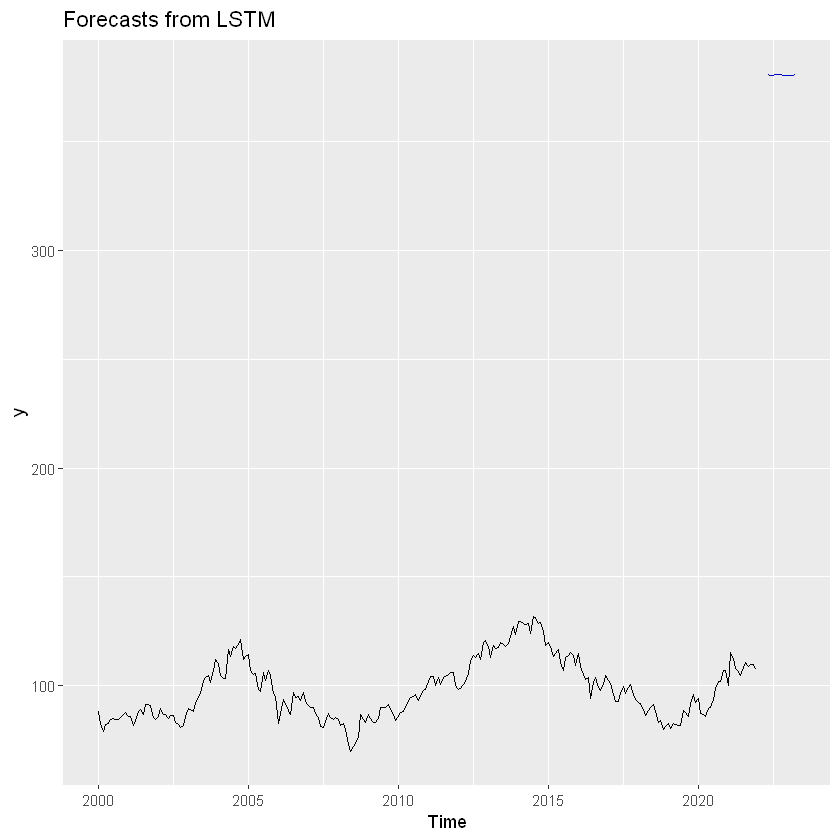

In [30]:
# Forecast Line Model
forecast::autoplot(forecast_list)